#### **Step 1: Collecting the data**

Dowloaded the auto mpg dataset from [UCI Ml repository](http://archive.ics.uci.edu/ml/datasets/Auto+MPG). And added it to the working directory.

In [1]:
# Importing general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the data

cols = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv('auto-mpg.data', names= cols, na_values= '?', comment='\t', sep= " ", skipinitialspace= True)
data = df.copy()

In [3]:
# data.head(10)
data.sample(20) #gives random 20 rows of data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
275,17.0,6,163.0,125.0,3140.0,13.6,78,2
93,14.0,8,318.0,150.0,4237.0,14.5,73,1
362,24.2,6,146.0,120.0,2930.0,13.8,81,3
187,17.5,8,305.0,140.0,4215.0,13.0,76,1
71,19.0,3,70.0,97.0,2330.0,13.5,72,3
201,18.5,6,250.0,110.0,3645.0,16.2,76,1
360,30.7,6,145.0,76.0,3160.0,19.6,81,2
380,36.0,4,120.0,88.0,2160.0,14.5,82,3
164,21.0,6,231.0,110.0,3039.0,15.0,75,1
174,18.0,6,171.0,97.0,2984.0,14.5,75,1


#### **Step 2: Problem Statement**  
The data contains MPG variable which tells about the efficiency of fuel consumption of a vehicle in 70s and 80s.  
Oue aim is to predict the **MPG variable** given other features.  

#### **Step 3: Explorataory Data Analysis (EDA)**

In [4]:
# Checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


* All columns have numerical data.  
* **Horsepower** Column has 392 values instead of 398. That means there could be missing values in Horsepower Column.

In [5]:
# Checking for the null values in the horsepower
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
# summary statistics of data
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<AxesSubplot:xlabel='Horsepower'>

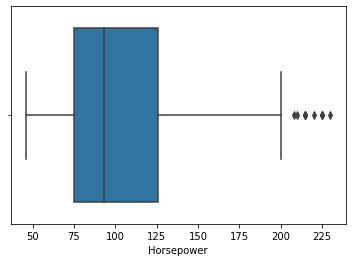

In [7]:
# plotting the boxplot for horsepower column.
sns.boxplot(x= data['Horsepower'])

In [8]:
# We will fill the missing values in horsepower with the median of horsepower.
med = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(med)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [9]:
# Category Distribution
data['Cylinders'].value_counts() # for values

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64

In [10]:
# Category distribution percentages
(data['Cylinders'].value_counts() / len(data)) * 100

4    51.256281
8    25.879397
6    21.105528
3     1.005025
5     0.753769
Name: Cylinders, dtype: float64

In [11]:
# for origin categorical variable
data['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

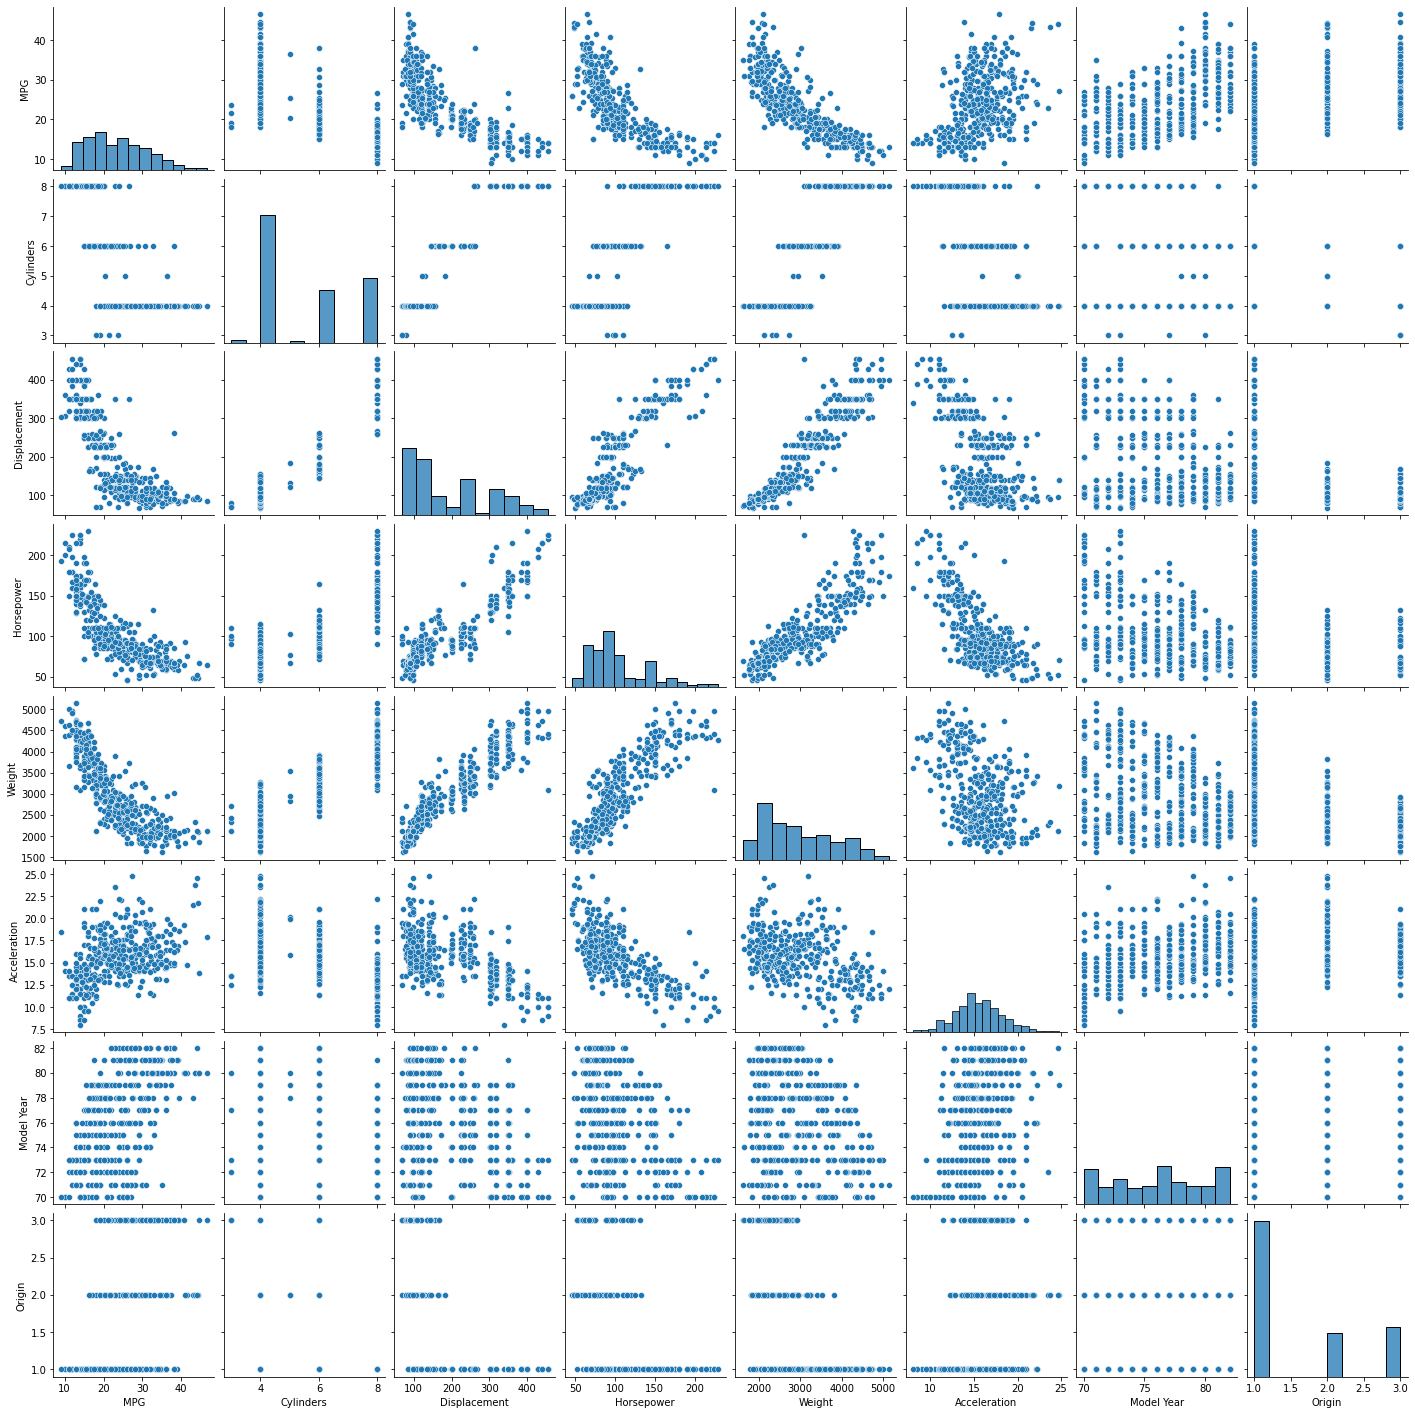

In [12]:
# plotting pairplots to find any potential correlations in the data
sns.pairplot(data[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']])

* **MPG** is negatively correlated to **Displacement, Horsepower and Weight**.
* **Weight** is positively correlated with both **Displacement and Horsepower**

#### **Step 4: Data Preparation**

Splitting the data into test and train

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 42)
for train_index, test_index in split.split(data, data['Cylinders']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

Separating Target and Feature variables

In [14]:
data = strat_train_set.drop("MPG", axis=1)
data_labels = strat_train_set['MPG'].copy()

Preprocessing the **Origin** column

In [15]:
def preprocessing_org_column(df):
    df['Origin'] = df['Origin'].map({1 : 'India', 2 : 'USA', 3 : 'Germany'})
    return df

data_tr = preprocessing_org_column(data)
data_tr.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,Germany
151,4,79.0,67.0,2000.0,16.0,74,USA
388,4,156.0,92.0,2585.0,14.5,82,India
48,6,250.0,88.0,3139.0,14.5,71,India
114,4,98.0,90.0,2265.0,15.5,73,USA


One Hot Encoding the **Origin** Column

In [16]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
 6   Origin        318 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 19.9+ KB


In [17]:
# isolating the origin column
data_categorical = data_tr[['Origin']]
data_categorical.head()

,Origin
145,Germany
151,USA
388,India
48,India
114,USA


In [18]:
# OneHOtEncoding the categorical attribute
from sklearn.preprocessing import OneHotEncoder

categorical_encoder = OneHotEncoder()
data_categorical_1hot = categorical_encoder.fit_transform(data_categorical)
data_categorical_1hot #sparse matrix

<318x3 sparse matrix of type '<class 'numpy.float64'>'
	with 318 stored elements in Compressed Sparse Row format>

In [19]:
# to visualize the encoded variable
data_categorical_1hot.toarray()[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [20]:
categorical_encoder.categories_

[array(['Germany', 'India', 'USA'], dtype=object)]

Handling missing values using SimpleImputer

In [21]:
# Separating numerical columns
numerical_data = data.iloc[:, :-1]
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 17.4 KB


In [22]:
# handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy= 'median')
imputer.fit(numerical_data)

SimpleImputer(strategy='median')

In [23]:
imputer.statistics_ #Returns the medians of the all 6 columns

array([   4. ,  146. ,   93.5, 2844. ,   15.5,   76. ])

In [24]:
# obtaining medians to verify
data.median().values

array([   4. ,  146. ,   93.5, 2844. ,   15.5,   76. ])

In [25]:
# imputing the missing values by transforming the dataframe
X = imputer.transform(numerical_data)
X

array([[   4. ,   83. ,   61. , 2003. ,   19. ,   74. ],
       [   4. ,   79. ,   67. , 2000. ,   16. ,   74. ],
       [   4. ,  156. ,   92. , 2585. ,   14.5,   82. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6,   82. ],
       [   4. ,  113. ,   95. , 2372. ,   15. ,   70. ],
       [   6. ,  146. ,  120. , 2930. ,   13.8,   81. ]])

In [26]:
# Convertng the 2D array back to dataframe
data_tr = pd.DataFrame(X, columns= numerical_data.columns, index= numerical_data.index)
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    float64
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    float64
dtypes: float64(6)
memory usage: 17.4 KB


Adding Attributes using BaseEstimator and Transformer

In [27]:
numerical_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
145,4,83.0,61.0,2003.0,19.0,74
151,4,79.0,67.0,2000.0,16.0,74
388,4,156.0,92.0,2585.0,14.5,82
48,6,250.0,88.0,3139.0,14.5,71
114,4,98.0,90.0,2265.0,15.5,73


In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

acc_ix, hpower_ix, cyl_ix = 4, 2, 0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power = True):
        self.acc_on_power = acc_on_power
    def fit(self, X, y= None):
        return self
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]

attr_adder = CustomAttrAdder(acc_on_power= True)
data_tr_extra_attrs = attr_adder.transform(data_tr.values)
data_tr_extra_attrs[0]

array([4.0000000e+00, 8.3000000e+01, 6.1000000e+01, 2.0030000e+03,
       1.9000000e+01, 7.4000000e+01, 3.1147541e-01, 4.7500000e+00])

#### **Step 5: Creating Pipeline of tasks**

In [29]:
# using pipeline class
from sklearn.pipeline import Pipeline
# Using StandardScaler to scale all the numerical values
from sklearn.preprocessing import StandardScaler

numerics = ['float64', 'int64']

num_data = data_tr.select_dtypes(include= numerics)

# Pipeline for numerical attributes
# imputing > adding attributes > scaling them

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= 'median')),
    ('attrs_adder', CustomAttrAdder()),
    ('std_scaler', StandardScaler())
])

num_data_tr = num_pipeline.fit_transform(numerical_data)
num_data_tr[0]

array([-0.85657842, -1.07804475, -1.15261228, -1.17220298,  1.21586943,
       -0.54436373,  1.71003081,  1.29565517])

Transforming Numerical and Categorical Atrributes

In [30]:
# transform different columns or subsets using Columntransformer
from sklearn.compose import ColumnTransformer

num_attrs = list(numerical_data)
cat_attrs = ["Origin"]

# Complete pipeline to transform both numerical and categorical attributes
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attrs),
    ('cat', OneHotEncoder(), cat_attrs),
])

prepared_data = full_pipeline.fit_transform(data)
prepared_data[0]

array([-0.85657842, -1.07804475, -1.15261228, -1.17220298,  1.21586943,
       -0.54436373,  1.71003081,  1.29565517,  1.        ,  0.        ,
        0.        ])